# Systematic Literature Review DX in Shipping

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from collections import Counter

In [10]:
# This cell is useful to check columns in the db. To be used only after having loaded the pandas df
substring = 'cited'
# List all column names containing the substring using list comprehension
matching_columns = [k for k in lit.columns if substring in k]
print(matching_columns)
#flat_obj['authorships_0_author_display_name']

['cited_by_count', 'cited_by_percentile_year_min', 'cited_by_percentile_year_max', 'cited_by_api_url', 'counts_by_year_0_cited_by_count', 'counts_by_year_1_cited_by_count', 'counts_by_year_2_cited_by_count', 'counts_by_year_3_cited_by_count', 'abstract_inverted_index_cited_0', 'counts_by_year_4_cited_by_count', 'counts_by_year_5_cited_by_count', 'counts_by_year_6_cited_by_count', 'counts_by_year_7_cited_by_count', 'counts_by_year_8_cited_by_count', 'counts_by_year_9_cited_by_count', 'counts_by_year_10_cited_by_count', 'counts_by_year_11_cited_by_count', 'counts_by_year_12_cited_by_count', 'abstract_inverted_index_solicited,_0']


## Read the DB in

In [6]:
# Read in the file
#lit = pd.read_csv('C:/projects/dx_in_shipping/openalex_data_final.csv')
lit = pd.read_csv('./openalex_data.csv',low_memory=False)

In [12]:
print(lit.count())

id                                              2293
doi                                             2324
title                                           2290
display_name                                    2290
publication_year                                2293
                                                ... 
abstract_inverted_index_filter.The_0               1
abstract_inverted_index_connectivity.Smart_0       1
abstract_inverted_index_costefficiency,_0          1
abstract_inverted_index_trade.This_0               1
abstract_inverted_index_remotely-piloted)_0        1
Length: 56322, dtype: int64


In [14]:
lit.head(5)

,id,doi,title,display_name,publication_year,publication_date,ids_openalex,ids_doi,language,primary_location_is_oa,...,abstract_inverted_index_PMBM_1,abstract_inverted_index_configurations.The_0,abstract_inverted_index_available.The_0,abstract_inverted_index_shown_1,abstract_inverted_index_applications.For_0,abstract_inverted_index_filter.The_0,abstract_inverted_index_connectivity.Smart_0,"abstract_inverted_index_costefficiency,_0",abstract_inverted_index_trade.This_0,abstract_inverted_index_remotely-piloted)_0
0,https://openalex.org/W4401344941,https://doi.org/10.1155/2024/5225558,Predictive Analysis of Maritime Congestion Usi...,Predictive Analysis of Maritime Congestion Usi...,2024.0,2024-01-01,https://openalex.org/W4401344941,https://doi.org/10.1155/2024/5225558,en,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://openalex.org/W4402480811,https://doi.org/10.12716/1001.18.03.12,VerifAI: Framework for Functional Verification...,VerifAI: Framework for Functional Verification...,2024.0,2024-01-01,https://openalex.org/W4402480811,https://doi.org/10.12716/1001.18.03.12,en,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://openalex.org/W4402458914,https://doi.org/10.1186/s13634-024-01182-8,Emerging trends in signal processing and machi...,Emerging trends in signal processing and machi...,2024.0,2024-09-11,https://openalex.org/W4402458914,https://doi.org/10.1186/s13634-024-01182-8,en,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://openalex.org/W4402480954,https://doi.org/10.12716/1001.18.03.19,Effectiveness of Problem-based Learning (PBL) ...,Effectiveness of Problem-based Learning (PBL) ...,2024.0,2024-01-01,https://openalex.org/W4402480954,https://doi.org/10.12716/1001.18.03.19,en,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://openalex.org/W4401956356,https://doi.org/10.3390/agronomy14091932,Enhancing Leafy Greens’ Production: Nutrient F...,Enhancing Leafy Greens’ Production: Nutrient F...,2024.0,2024-08-28,https://openalex.org/W4401956356,https://doi.org/10.3390/agronomy14091932,en,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Descriptive analysis

Publication counts per year:


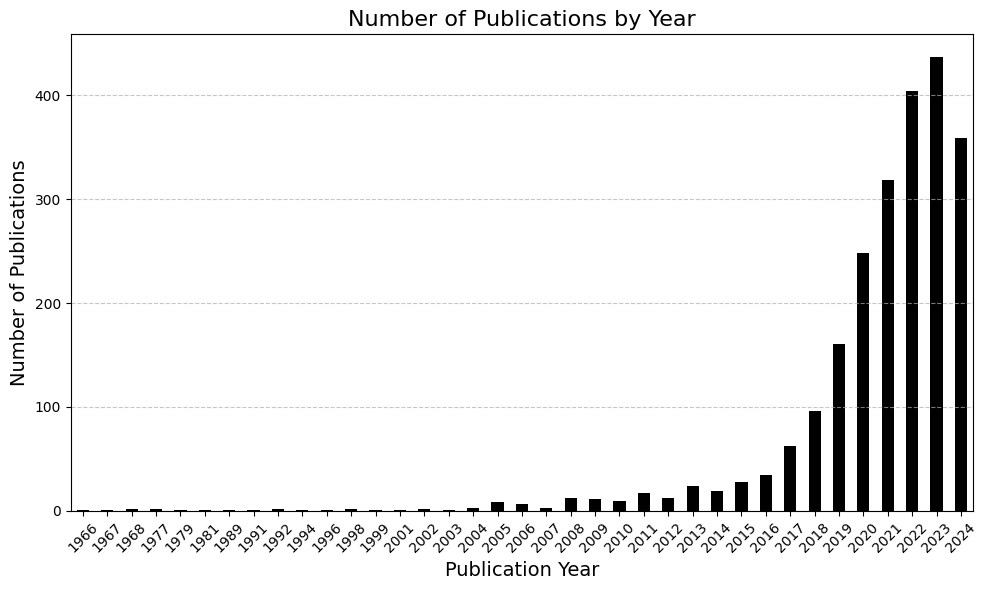

In [22]:
# 1. Number of publications over time
publication_counts = lit['publication_year'].value_counts().sort_index()
print("Publication counts per year:")
#print(publication_counts)

# Plotting the column chart
plt.figure(figsize=(10, 6))
ax = publication_counts.plot(kind='bar', color='black')
publication_counts.plot(kind='bar', color='black')
plt.title('Number of Publications by Year', fontsize=16)
plt.xlabel('Publication Year', fontsize=14)
plt.ylabel('Number of Publications', fontsize=14)

# Adjusting x-ticks to avoid overlap
plt.xticks(rotation=45)  # Rotate x labels to 45 degrees

# Adjust x-ticks to display as integers
ax.set_xticklabels([int(float(label.get_text())) for label in ax.get_xticklabels()], rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.tight_layout()  # Adjust layout
plt.show()

                   Author  Count
0              Zaili Yang     25
1            Kum Fai Yuen     19
2     Jasmine Siu Lee Lam     13
3            Ryan Wen Liu     12
4                 Ran Yan     12
...                   ...    ...
7582        Donghong Ding      1
7583       Montserrat Ros      1
7584           Haochen Mu      1
7585             Lei Yuan      1
7586            Yulong Su      1

[7587 rows x 2 columns]


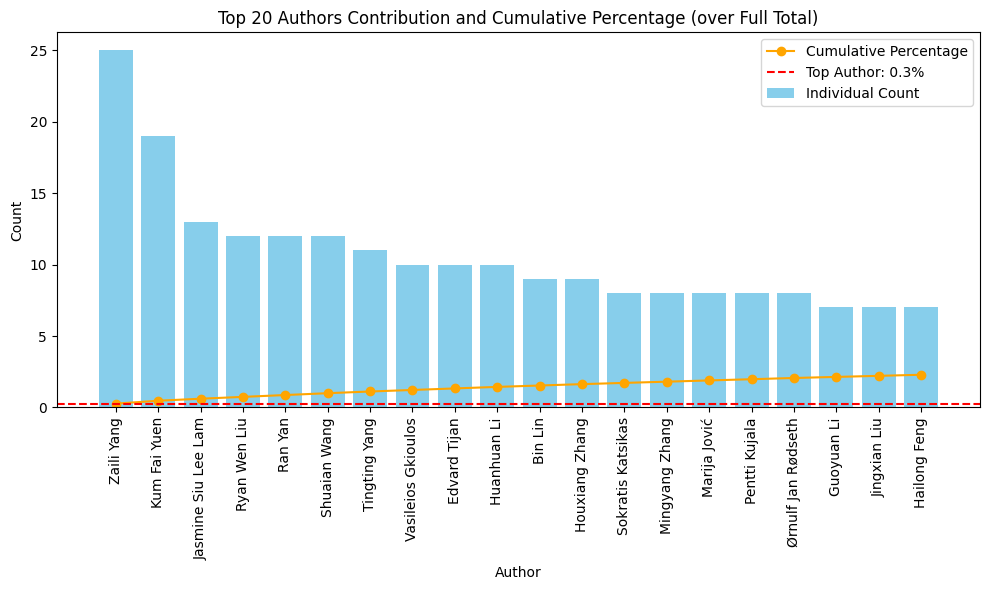

                 Author  Count  Cumulative Percentage  Percentage
0            Zaili Yang     25               0.268673    0.268673
1          Kum Fai Yuen     19               0.472864    0.204191
2   Jasmine Siu Lee Lam     13               0.612574    0.139710
3          Ryan Wen Liu     12               0.741537    0.128963
4               Ran Yan     12               0.870500    0.128963
5          Shuaian Wang     12               0.999463    0.128963
6         Tingting Yang     11               1.117679    0.118216
7    Vasileios Gkioulos     10               1.225148    0.107469
8          Edvard Tijan     10               1.332617    0.107469
9           Huanhuan Li     10               1.440086    0.107469
10              Bin Lin      9               1.536808    0.096722
11       Houxiang Zhang      9               1.633530    0.096722
12    Sokratis Katsikas      8               1.719506    0.085975
13       Mingyang Zhang      8               1.805481    0.085975
14        

In [24]:
# 2. Leading authors

# find all useful columns
substring = 'author_display_name'
matching_columns = [k for k in lit.columns if substring in k]

# Step 1: Collect all author names from the specified columns
author_list = lit[matching_columns].values.ravel()  # Flatten to a 1D array of author names

# Step 2: Remove any NaN values from the list if they exist
author_list = [author for author in author_list if pd.notna(author)]

# Step 3: Count the frequency of each author name
author_counts = Counter(author_list)

# Step 4: Convert the counts to a DataFrame, sort by count in descending order
author_df = pd.DataFrame(author_counts.items(), columns=['Author', 'Count']).sort_values(by='Count', ascending=False).reset_index(drop=True)

# Display the result
print(author_df)

# Calculate the normal and cumulative percentage of appearances
total_count = author_df['Count'].sum()
author_df['Cumulative Percentage'] = author_df['Count'].cumsum() / total_count * 100

# Calculate individual percentage for each author
author_df['Percentage'] = author_df['Count'] / total_count * 100

# Now select the top 20 authors for plotting
top_20_authors_df = author_df.head(20)

# Plot the cumulative percentage bar plot for the top 20 authors only
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_20_authors_df['Author'], top_20_authors_df['Count'], color='skyblue', label="Individual Count")
ax.plot(top_20_authors_df['Author'], top_20_authors_df['Cumulative Percentage'], color='orange', marker='o', label="Cumulative Percentage")

# Highlight the top author’s contribution
top_author_percentage = author_df['Cumulative Percentage'].iloc[0]
ax.axhline(y=top_author_percentage, color='red', linestyle='--', label=f"Top Author: {top_author_percentage:.1f}%")

# Labels and Title
plt.xticks(rotation=90)
plt.xlabel("Author")
plt.ylabel("Count")
plt.title("Top 20 Authors Contribution and Cumulative Percentage (over Full Total)")
plt.legend()
plt.tight_layout()
plt.show()

print(top_20_authors_df)

                                                inst  Count
0                         Dalian Maritime University    287
1                     Wuhan University of Technology    178
2     Norwegian University of Science and Technology    156
3                       Shanghai Maritime University    146
4                   Nanyang Technological University     96
...                                              ...    ...
1786                             University of Seoul      1
1787            Novia University of Applied Sciences      1
1788                     Sheffield Hallam University      1
1789                Chengdu University of Technology      1
1790                Hainan Tropical Ocean University      1

[1791 rows x 2 columns]


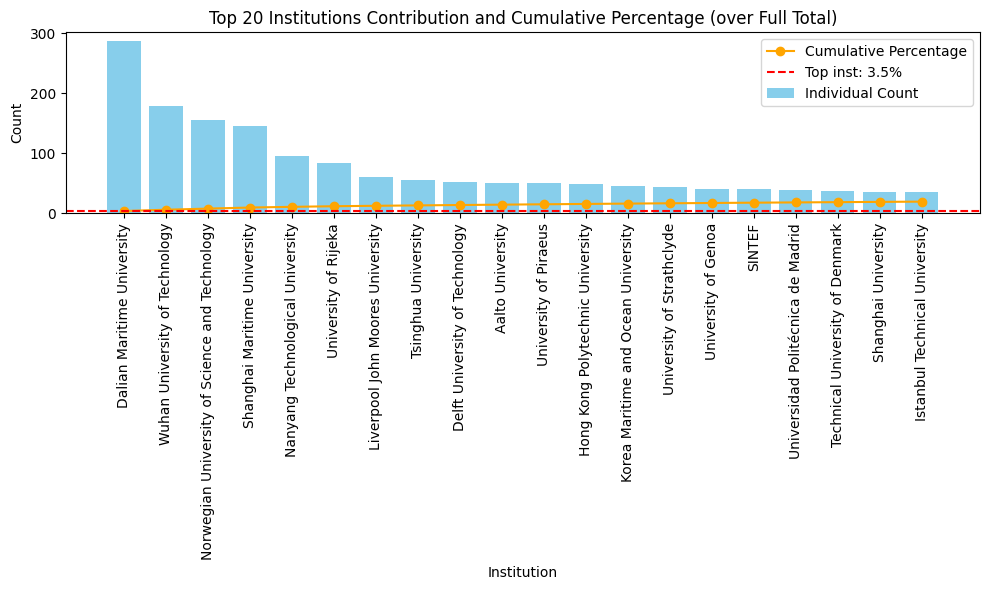

                                              inst  Count  \
0                       Dalian Maritime University    287   
1                   Wuhan University of Technology    178   
2   Norwegian University of Science and Technology    156   
3                     Shanghai Maritime University    146   
4                 Nanyang Technological University     96   
5                             University of Rijeka     84   
6                 Liverpool John Moores University     60   
7                              Tsinghua University     55   
8                   Delft University of Technology     52   
9                                 Aalto University     51   
10                           University of Piraeus     50   
11                Hong Kong Polytechnic University     49   
12             Korea Maritime and Ocean University     46   
13                       University of Strathclyde     44   
14                             University of Genoa     41   
15                      

In [26]:
# 3. Institutions

# find all useful columns
substring = 'institutions_0_display_name'
matching_columns = [k for k in lit.columns if substring in k]

# Step 1: Collect all institution names from the specified columns
inst_list = lit[matching_columns].values.ravel()  # Flatten to a 1D array of institution names

# Step 2: Remove any NaN values from the list if they exist
inst_list = [inst for inst in inst_list if pd.notna(inst)]

# Step 3: Count the frequency of each institution name
inst_counts = Counter(inst_list)

# Step 4: Convert the counts to a DataFrame, sort by count in descending order
inst_df = pd.DataFrame(inst_counts.items(), columns=['inst', 'Count']).sort_values(by='Count', ascending=False).reset_index(drop=True)

# Display the result
print(inst_df)

# Calculate the normal and cumulative percentage of appearances
total_count = inst_df['Count'].sum()
inst_df['Cumulative Percentage'] = inst_df['Count'].cumsum() / total_count * 100

# Calculate individual percentage for each inst
inst_df['Percentage'] = inst_df['Count'] / total_count * 100

# Now select the top 20 insts for plotting
top_20_insts_df = inst_df.head(20)

# Plot the cumulative percentage bar plot for the top 20 insts only
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_20_insts_df['inst'], top_20_insts_df['Count'], color='skyblue', label="Individual Count")
ax.plot(top_20_insts_df['inst'], top_20_insts_df['Cumulative Percentage'], color='orange', marker='o', label="Cumulative Percentage")

# Highlight the top inst’s contribution
top_inst_percentage = inst_df['Cumulative Percentage'].iloc[0]
ax.axhline(y=top_inst_percentage, color='red', linestyle='--', label=f"Top inst: {top_inst_percentage:.1f}%")

# Labels and Title
plt.xticks(rotation=90)
plt.xlabel("Institution")
plt.ylabel("Count")
plt.title("Top 20 Institutions Contribution and Cumulative Percentage (over Full Total)")
plt.legend()
plt.tight_layout()
plt.show()

print(top_20_insts_df)

   inst  Count
0    CN   2457
1    US    767
2    GB    466
3    NO    368
4    KR    353
..  ...    ...
87   TG      1
88   KE      1
89   GH      1
90   TN      1
91   MM      1

[92 rows x 2 columns]


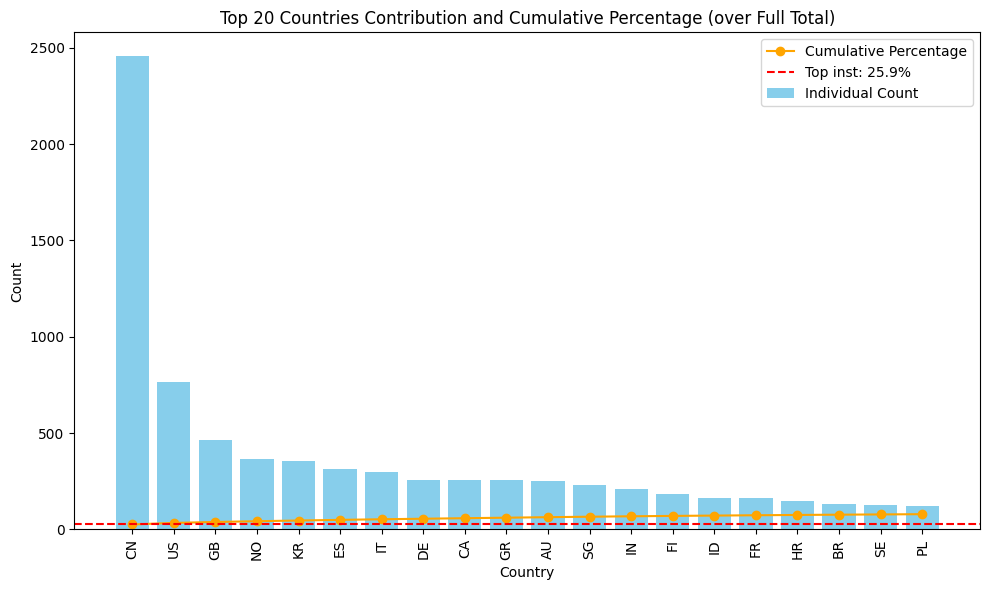

   inst  Count  Cumulative Percentage  Percentage
0    CN   2457              25.920456   25.920456
1    US    767              34.012027    8.091571
2    GB    466              38.928157    4.916130
3    NO    368              42.810423    3.882266
4    KR    353              46.534445    3.724022
5    ES    315              49.857580    3.323135
6    IT    300              53.022471    3.164891
7    DE    257              55.733727    2.711256
8    CA    257              58.444984    2.711256
9    GR    255              61.135141    2.690157
10   AU    249              63.762000    2.626859
11   SG    233              66.220065    2.458065
12   IN    212              68.456588    2.236523
13   FI    183              70.387172    1.930583
14   ID    162              72.096213    1.709041
15   FR    161              73.794704    1.698491
16   HR    148              75.356050    1.561346
17   BR    132              76.748602    1.392552
18   SE    125              78.067307    1.318705


In [28]:
# 4. Countries

# find all useful columns
substring = '_country_code'
matching_columns = [k for k in lit.columns if substring in k]

# Step 1: Collect all institution names from the specified columns
countryCodelist = lit[matching_columns].values.ravel()  # Flatten to a 1D array of institution names

# Step 2: Remove any NaN values from the list if they exist
countryCodelist = [inst for inst in countryCodelist if pd.notna(inst)]

# Step 3: Count the frequency of each institution name
countryCodecounts = Counter(countryCodelist)

# Step 4: Convert the counts to a DataFrame, sort by count in descending order
countryCodedf = pd.DataFrame(countryCodecounts.items(), columns=['inst', 'Count']).sort_values(by='Count', ascending=False).reset_index(drop=True)

# Display the result
print(countryCodedf)

# Calculate the normal and cumulative percentage of appearances
total_count = countryCodedf['Count'].sum()
countryCodedf['Cumulative Percentage'] = countryCodedf['Count'].cumsum() / total_count * 100

# Calculate individual percentage for each inst
countryCodedf['Percentage'] = countryCodedf['Count'] / total_count * 100

# Now select the top 20 insts for plotting
top_20_insts_df = countryCodedf.head(20)

# Plot the cumulative percentage bar plot for the top 20 insts only
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_20_insts_df['inst'], top_20_insts_df['Count'], color='skyblue', label="Individual Count")
ax.plot(top_20_insts_df['inst'], top_20_insts_df['Cumulative Percentage'], color='orange', marker='o', label="Cumulative Percentage")

# Highlight the top inst’s contribution
top_countryCodepercentage = countryCodedf['Cumulative Percentage'].iloc[0]
ax.axhline(y=top_countryCodepercentage, color='red', linestyle='--', label=f"Top inst: {top_countryCodepercentage:.1f}%")

# Labels and Title
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Top 20 Countries Contribution and Cumulative Percentage (over Full Total)")
plt.legend()
plt.tight_layout()
plt.show()

print(top_20_insts_df)

In [32]:
# 5. Citation counts

# Assuming your dataset is a DataFrame called lit_df with 'title' and 'citation_normalized_percentile'
# Sort the dataset by 'cited_by_count' but only include rows where 'cited_by_count' is not NaN
top_20_articles_cited = lit[lit['cited_by_count'].notna()].sort_values(by='cited_by_count', ascending=False).head(20)


# Select only the title and citation_normalized_percentile columns for display
top_20_articles_report = top_20_articles_cited[['title', 'doi', 'cited_by_count']]

# Display the top 20 articles
print(top_20_articles_report)

# average_citations = df['citations'].mean()
# total_citations = df['citations'].sum()
# print("\nCitation statistics:")
# print(f"Total citations: {total_citations}")
# print(f"Average citations per publication: {average_citations:.2f}")

                                                  title  \
1277  Blockchain technology in supply chain operatio...   
2052      Data Security in the World of Cloud Computing   
1139              Safety in shipping: The human element   
1111          From Predictive to Prescriptive Analytics   
1257  A modelling system for the exhaust emissions o...   
2102  6G Wireless Channel Measurements and Models: T...   
355   How big data enriches maritime research – a cr...   
540   Maritime shipping digitalization: Blockchain-b...   
774   Energy storage emerging: A perspective from th...   
2299  Internet of Underwater Things and Big Marine D...   
1247  Global supply chain and port/terminal: integra...   
2179  Collaborative Multi-Robot Search and Rescue: P...   
567   Big data and artificial intelligence in the ma...   
1230  AN EMPIRICAL ANALYSIS OF FACTORS INFLUENCING I...   
1241  The Ship Domain – A Criterion of Navigational ...   
1275  Augmenting the algorithm: Emerging human-in-th... 